# Content
1. [Clustering and Customer Segmentation](#1)
1. [Read Data](#2)
1. [Visualization](#3)
1. [Clustering](#4)
    1. [KMeans Clustering](#5)
        * [Income and Spending Score](#6)
        * [Age and Spending Score](#7)
    1. [Hierarchical Clustering](#8)
        * [Dendrogram](#9)
        * [Income and Spending Score](#10)
1. [Conclusion](#11)

 <a id = '1'></a><br>
# Clustering and Customer Segmentation

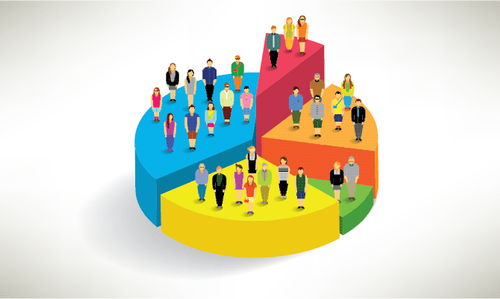

#### * Generally, machine learning is splitted as supervised learning (regression & classification), unsupervised learning (clustering) and reinforcement learning.
#### * If you a bit familiar with classification you may ask what is the difference ? (I asked :) 
#### * Supervised learning is learning through our eyes. Borders are created according to our requests. Man-Woman ? or Cat-Dog ? ...
#### * In unsupervised learning, the computer interprets the data itself (no labels) and defines its limits freely. No human eyes.
#### * It is generally using in customer segmentation, market segmentation, health and image proccesing.
#### * So what is customer segmentation:
#### * Which product to which customer ?, which product to specific customer ? (Collabration Filtering) 
#### * Know customers or create demagogical classes from historical data, show the same advertisements to the same class instead of showing them individually.
#### * For example : High income, middle income, low income. Those in the same segment are likely to show the same behaivor.
#### * If subway riders exhibit bag-buying behavior then place bag advertisements in subway stations.
#### * Basically, clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.
#### * Logically, our aim should be keeping the distance of data within the same cluster to a minimum and the distance between clusters to a maximum.


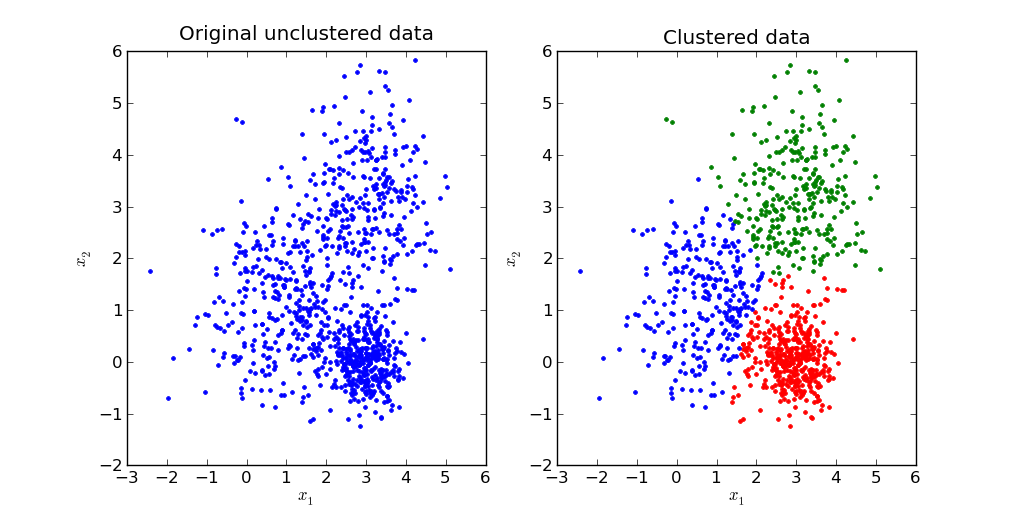!

 <a id = '2'></a><br>
# Read Data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.corr()

#### Not much corrolations between columns.

 <a id = '3'></a><br>
# Visualization

#### First check how many male and female :

In [ ]:
data["Gender"].value_counts()

In [ ]:
sns.countplot(data["Gender"], palette="bone")
plt.show()

#### Distributions

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data["Annual Income (k$)"])
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(data["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(data["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

 <a id = '4'></a><br>
# Clustering

 <a id = '5'></a><br>
# K Means Clustering

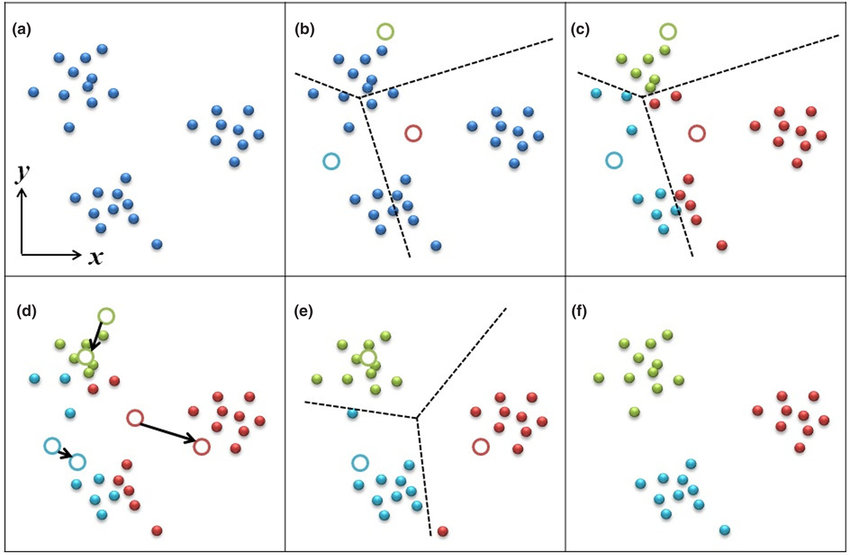

#### Basically, K-Means can be considered in 5 steps :
#### 1. Choose k values (eg:3)
#### 2. Centroids occur randomly (blank middle circles)
#### 3. Group data points by distence from centroid. (Distances are measured with euclidian distance as default)
#### 4. Avaraged over data points for each group and lines drawn. (This could be reply several times.)
#### 5. Find new centroid location until centroids location do not change. (Each centroid approaches where the number of data point is higher for own segment)

 <a id = '6'></a><br>
### Income and Spending Score

In [ ]:
from sklearn.cluster import KMeans
x_data1 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values 
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_data1)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

#### There are some concetpts here that need to be explained here like wcss, inertia and elbow rule:
#### 1. What is wcss : Within Cluster Sum of Square --> This is a mathematical method 
#### 2. Inertia : Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia and a low number of clusters ( K ). In other words inertia measuring by wcss.
#### 3. Elbow point : The theory says that the number where breaking point occur is optimum number of k. 

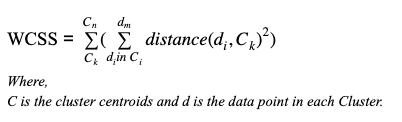

#### So, for the data which include income and spending score, the optimum k value is 5. Lets try

In [ ]:
kmean_x_data1 = KMeans(n_clusters=5, random_state=0)
clusters = kmean_x_data1.fit_predict(x_data1)
data["Label1"] = clusters

In [ ]:
data.head(2)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x_data1[clusters == 0,0 ],x_data1[clusters == 0,1 ],color = "green", label = "High income-Low Spanding")
plt.scatter(x_data1[clusters == 1,0 ],x_data1[clusters == 1,1 ],color = "red", label = "Middle income-Middle Spandingg")
plt.scatter(x_data1[clusters == 2,0 ],x_data1[clusters == 2,1 ],color = "purple", label = "High income-High Spanding")
plt.scatter(x_data1[clusters == 3,0 ],x_data1[clusters == 3,1 ],color = "cyan", label = "Low income-High Spanding")
plt.scatter(x_data1[clusters == 4,0 ],x_data1[clusters == 4,1 ],color = "orange", label = "Low income-Low Spanding")
plt.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1], color="black", label="Centroids",s =75)#0,1 x and y axis
plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Income and Spending Score")
plt.show()

#### If you interested the people in purple group :

In [ ]:
data[(data["Label1"]<3) & (data["Label1"]>1)].groupby("CustomerID").head()

 <a id = '7'></a><br>
### Age and Spending Score

In [ ]:
from sklearn.cluster import KMeans
x_data2 = data[['Age', 'Spending Score (1-100)']].iloc[: , :].values 
wcss2 = []
for k in range(1,15):
    kmean2 = KMeans(n_clusters=k, random_state=0)
    kmean2.fit(x_data2)
    wcss2.append(kmean2.inertia_)
    
plt.plot(range(1,15), wcss2)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [ ]:
kmean_x_data2 = KMeans(n_clusters=4, random_state=0)
clusters2 = kmean_x_data2.fit_predict(x_data2)
data["Label2"] = clusters2

In [ ]:
data.head(2)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x_data2[clusters2 == 1,0 ],x_data2[clusters2 == 1,1 ],color = "red", label = "A group")
plt.scatter(x_data2[clusters2 == 2,0 ],x_data2[clusters2 == 2,1 ],color = "purple", label = "B group")
plt.scatter(x_data2[clusters2 == 3,0 ],x_data2[clusters2 == 3,1 ],color = "cyan", label = "C group")
plt.scatter(x_data2[clusters2 == 0,0 ],x_data2[clusters2 == 0,1 ],color = "green", label = "D group")
plt.scatter(kmean_x_data2.cluster_centers_[:,0], kmean_x_data2.cluster_centers_[:,1], color="black", label="Centroids", s=75)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Age and Spending Score")
plt.show()

#### After these, it is easy to extrapolate something from data. Specific treatments etc ... 

In [ ]:
data[(data["Label1"]<3) & (data["Label1"]>1)].groupby("CustomerID").head()

#### Lastly, when label1 == 2, label2 == 1 (1 : red) (except for 1 data) 

 <a id = '8'></a><br>
# Hierarchical Clustering

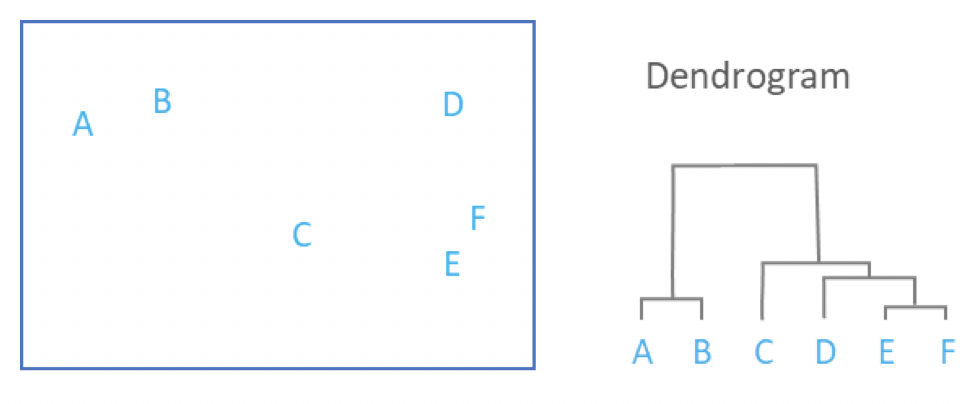

#### Basically, Hierarchical Clustering can be considered in 4 steps :
#### 1. Cluster each data point
#### 2. Make the two closest data points a cluster
#### 3. Make two nearest clusters a cluster
#### 4. Repeat 3rd step.

#### You may ask how the distance measured ?:
#### With euclidian distance with different methods:
#### 1. By the nearest two points
#### 2. By the furthest two points
#### 3. By the mean
#### 4. By the centroid

 <a id = '9'></a><br>
### Dendrogram

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(x_data1, method="ward") # ward : mathematical expression
dendrogram(merg, leaf_rotation=90)

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram")
plt.show()

#### So what is dendrogram:
#### * We can use dendrogram for estimate how many clusters do we need.
#### * Basic aproach is like that : 
#### * Find the longest vertical line that is not intersected by any line horizontally. Draw a threshold from there. The number of lines crossed by the boundary gives the number of clusters.

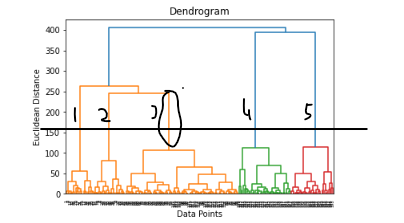

 <a id = '10'></a><br>
### Income and Spending Score

#### According to dendrogram for this data (x_data1 : income and spending score) number of clusters should be 5 (As KMeans)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5 ,affinity="euclidean", linkage="ward")
cluster3 = hc.fit_predict(x_data1)
data["Label3"] = cluster3

In [ ]:
data.head(2)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x_data1[cluster3 == 0,0 ],x_data1[cluster3 == 0,1 ],color = "green", label = "High income-Low Spanding")
plt.scatter(x_data1[cluster3 == 1,0 ],x_data1[cluster3 == 1,1 ],color = "red", label = "Middle income-Middle Spandingg")
plt.scatter(x_data1[cluster3 == 2,0 ],x_data1[cluster3 == 2,1 ],color = "purple", label = "High income-High Spanding")
plt.scatter(x_data1[cluster3 == 3,0 ],x_data1[cluster3 == 3,1 ],color = "cyan", label = "Low income-High Spanding")
plt.scatter(x_data1[cluster3 == 4,0 ],x_data1[cluster3 == 4,1 ],color = "orange", label = "Low income-Low Spanding")
plt.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1], color="black", label="Centroids",s =75)#0,1 x and y axis
plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Income and Spending Score")
plt.show()

#### As you see, we clustered same datas (x_data1: income and spending score) with different clustering algorithms (KMeans and Hierarchial). At first sight, they are looking same or very familiar. 

 <a id = '11'></a><br>
# Conclusion
#### In this tutorial, we mentioned what clustering and segemntation is, than learned and coded KMeans & Hierarchial Clustering. 